### Create SparkSession object

In [247]:
from pyspark.sql import SparkSession
from pyspark.sql import types as T
from pyspark.sql import functions as F
from time import time

spark = SparkSession \
    .builder \
    .appName("Data Source API using PySpark Demo") \
    .getOrCreate()

In [2]:
spark

### Data Source API for CSV file format using PySpark

<a href='https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader'>PySpark API Docs</a>
<br/>
<a href='https://spark.apache.org/docs/2.4.3/sql-data-sources.html#data-sources'>Spark Data Source Guide</a> 

In [3]:
# Read in the transaction details csv file
transaction_detail_df = spark.read.csv("transaction_detail.csv")

In [4]:
transaction_detail_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)



In [9]:
transaction_detail_df.show(5, False)

+------------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+
|_c0               |_c1                  |_c2                               |_c3                     |_c4                 |_c5           |_c6                  |_c7                     |
+------------------+---------------------+----------------------------------+------------------------+--------------------+--------------+---------------------+------------------------+
|transaction_amount|transaction_card_type|transaction_ecommerce_website_name|transaction_country_name|transaction_datetime|transaction_id|transaction_city_name|transaction_product_name|
|50.85             |MasterCard           |www.ebay.com                      |India                   |2019-05-14 15:24:12 |1             |Mumbai               |Laptop                  |
|259.12            |MasterCard           |www.amazon.com              

In [10]:
transaction_detail_df.limit(5).toPandas()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7
0,transaction_amount,transaction_card_type,transaction_ecommerce_website_name,transaction_country_name,transaction_datetime,transaction_id,transaction_city_name,transaction_product_name
1,50.85,MasterCard,www.ebay.com,India,2019-05-14 15:24:12,1,Mumbai,Laptop
2,259.12,MasterCard,www.amazon.com,India,2019-05-14 15:24:13,2,Pune,Wrist Band
3,328.16,MasterCard,www.flipkart.com,United States,2019-05-14 15:24:14,3,New York City,TV Stand
4,399.06,Visa,www.snapdeal.com,Inida,2019-05-14 15:24:15,4,New Delhi,TV Stand


In [15]:
transaction_detail_df = spark.read.csv("transaction_detail.csv", header=True, inferSchema=True)

In [16]:
transaction_detail_df.printSchema()

root
 |-- transaction_amount: double (nullable = true)
 |-- transaction_card_type: string (nullable = true)
 |-- transaction_ecommerce_website_name: string (nullable = true)
 |-- transaction_country_name: string (nullable = true)
 |-- transaction_datetime: timestamp (nullable = true)
 |-- transaction_id: integer (nullable = true)
 |-- transaction_city_name: string (nullable = true)
 |-- transaction_product_name: string (nullable = true)



In [80]:
# Schema without writing as a function

schema = T.StructType([
    T.StructField("transaction_amount", T.DoubleType(), True),
    T.StructField("transaction_card_type", T.StringType(), True),
    T.StructField("transaction_ecommerce_website_name", T.StringType(), True),
    T.StructField("transaction_country_name", T.StringType(), True),
    T.StructField("transaction_datetime", T.TimestampType(), True),
    T.StructField("transaction_id", T.IntegerType(), True),
    T.StructField("transaction_city_name", T.StringType(), True),
    T.StructField("transaction_product_name", T.StringType(), True)
])

transaction_detail_df = spark.read.csv("transaction_detail.csv", header=True, schema=schema)

In [148]:
# Schema with a function

schema = [
    ("transaction_amount", T.DoubleType(), True),
    ("transaction_card_type", T.StringType(), True),
    ("transaction_ecommerce_website_name", T.StringType(), True),
    ("transaction_country_name", T.StringType(), True),
    ("transaction_datetime", T.TimestampType(), True),
    ("transaction_id", T.IntegerType(), True),
    ("transaction_city_name", T.StringType(), True),
    ("transaction_product_name", T.StringType(), True)
]

def get_schema(*args):
    return T.StructType([
        T.StructField(*arg)
        for arg in args
    ])

transaction_detail_df = spark.read.csv("transaction_detail.csv", header=True, schema=get_schema(*schema))

In [149]:
transaction_detail_df.limit(5).toPandas()

,transaction_amount,transaction_card_type,transaction_ecommerce_website_name,transaction_country_name,transaction_datetime,transaction_id,transaction_city_name,transaction_product_name
0,50.85,MasterCard,www.ebay.com,India,2019-05-14 15:24:12,1,Mumbai,Laptop
1,259.12,MasterCard,www.amazon.com,India,2019-05-14 15:24:13,2,Pune,Wrist Band
2,328.16,MasterCard,www.flipkart.com,United States,2019-05-14 15:24:14,3,New York City,TV Stand
3,399.06,Visa,www.snapdeal.com,Inida,2019-05-14 15:24:15,4,New Delhi,TV Stand
4,194.52,Visa,www.ebay.com,Italy,2019-05-14 15:24:16,5,Rome,External Hard Drive


In [150]:
transaction_detail_df.printSchema()

root
 |-- transaction_amount: double (nullable = true)
 |-- transaction_card_type: string (nullable = true)
 |-- transaction_ecommerce_website_name: string (nullable = true)
 |-- transaction_country_name: string (nullable = true)
 |-- transaction_datetime: timestamp (nullable = true)
 |-- transaction_id: integer (nullable = true)
 |-- transaction_city_name: string (nullable = true)
 |-- transaction_product_name: string (nullable = true)



In [151]:
transaction_detail_df.count()

1000

In [152]:
transaction_detail_df.limit(5).toPandas()

,transaction_amount,transaction_card_type,transaction_ecommerce_website_name,transaction_country_name,transaction_datetime,transaction_id,transaction_city_name,transaction_product_name
0,50.85,MasterCard,www.ebay.com,India,2019-05-14 15:24:12,1,Mumbai,Laptop
1,259.12,MasterCard,www.amazon.com,India,2019-05-14 15:24:13,2,Pune,Wrist Band
2,328.16,MasterCard,www.flipkart.com,United States,2019-05-14 15:24:14,3,New York City,TV Stand
3,399.06,Visa,www.snapdeal.com,Inida,2019-05-14 15:24:15,4,New Delhi,TV Stand
4,194.52,Visa,www.ebay.com,Italy,2019-05-14 15:24:16,5,Rome,External Hard Drive


## Performing Transformations

### collect()

In [153]:
# transaction_detail_df.collect() # Do not use this for big datasets

### select()

In [202]:
transaction_detail_df_stg1 = transaction_detail_df.select("transaction_card_type", "transaction_country_name", "transaction_amount", "transaction_datetime")
transaction_detail_df_stg1.show(5)

+---------------------+------------------------+------------------+--------------------+
|transaction_card_type|transaction_country_name|transaction_amount|transaction_datetime|
+---------------------+------------------------+------------------+--------------------+
|           MasterCard|                   India|             50.85| 2019-05-14 15:24:12|
|           MasterCard|                   India|            259.12| 2019-05-14 15:24:13|
|           MasterCard|           United States|            328.16| 2019-05-14 15:24:14|
|                 Visa|                   Inida|            399.06| 2019-05-14 15:24:15|
|                 Visa|                   Italy|            194.52| 2019-05-14 15:24:16|
+---------------------+------------------------+------------------+--------------------+
only showing top 5 rows



### groupby() and aggregate

In [227]:
transaction_detail_df_stg1.groupby('transaction_card_type').agg({'transaction_amount': 'sum'}).show()

+---------------------+-----------------------+
|transaction_card_type|sum(transaction_amount)|
+---------------------+-----------------------+
|              Maestro|      91002.73999999998|
|                 Visa|      88020.94000000006|
|           MasterCard|     100876.58000000007|
+---------------------+-----------------------+



In [235]:
transaction_detail_df_stg1.groupby('transaction_card_type').\
        agg(F.sum('transaction_amount').alias('sum'),
            F.count('transaction_amount').alias('count')
            ).show()

+---------------------+------------------+-----+
|transaction_card_type|               sum|count|
+---------------------+------------------+-----+
|              Maestro| 91002.73999999998|  330|
|                 Visa| 88020.94000000006|  308|
|           MasterCard|100876.58000000007|  362|
+---------------------+------------------+-----+



### filter() and where()

In [205]:
transaction_detail_df_stg1.filter(transaction_detail_df_stg1.transaction_country_name == 'India').show(5)
transaction_detail_df_stg1.where(transaction_detail_df_stg1.transaction_country_name == 'India').show(5)

+---------------------+------------------------+------------------+--------------------+
|transaction_card_type|transaction_country_name|transaction_amount|transaction_datetime|
+---------------------+------------------------+------------------+--------------------+
|           MasterCard|                   India|             50.85| 2019-05-14 15:24:12|
|           MasterCard|                   India|            259.12| 2019-05-14 15:24:13|
|              Maestro|                   India|            415.65| 2019-05-14 15:24:17|
|           MasterCard|                   India|            467.12| 2019-05-14 15:24:18|
|                 Visa|                   India|            361.61| 2019-05-14 15:24:19|
+---------------------+------------------------+------------------+--------------------+
only showing top 5 rows

+---------------------+------------------------+------------------+--------------------+
|transaction_card_type|transaction_country_name|transaction_amount|transaction_dateti

In [206]:
transaction_detail_df_stg1.filter(F.col("transaction_country_name") == 'India').show(5)
transaction_detail_df_stg1.where(F.col("transaction_country_name") == 'India').show(5)

+---------------------+------------------------+------------------+--------------------+
|transaction_card_type|transaction_country_name|transaction_amount|transaction_datetime|
+---------------------+------------------------+------------------+--------------------+
|           MasterCard|                   India|             50.85| 2019-05-14 15:24:12|
|           MasterCard|                   India|            259.12| 2019-05-14 15:24:13|
|              Maestro|                   India|            415.65| 2019-05-14 15:24:17|
|           MasterCard|                   India|            467.12| 2019-05-14 15:24:18|
|                 Visa|                   India|            361.61| 2019-05-14 15:24:19|
+---------------------+------------------------+------------------+--------------------+
only showing top 5 rows

+---------------------+------------------------+------------------+--------------------+
|transaction_card_type|transaction_country_name|transaction_amount|transaction_dateti

### isin()

In [207]:
# transaction_detail_df_stg1.filter(F.col("transaction_country_name").isin('India', 'Singapore')).show()
transaction_detail_df_stg1.where(F.col("transaction_country_name").isin('India', 'Singapore')).show()

+---------------------+------------------------+------------------+--------------------+
|transaction_card_type|transaction_country_name|transaction_amount|transaction_datetime|
+---------------------+------------------------+------------------+--------------------+
|           MasterCard|                   India|             50.85| 2019-05-14 15:24:12|
|           MasterCard|                   India|            259.12| 2019-05-14 15:24:13|
|              Maestro|                   India|            415.65| 2019-05-14 15:24:17|
|           MasterCard|                   India|            467.12| 2019-05-14 15:24:18|
|                 Visa|                   India|            361.61| 2019-05-14 15:24:19|
|              Maestro|                   India|            357.34| 2019-05-14 15:24:20|
|                 Visa|                   India|            495.91| 2019-05-14 15:24:21|
|                 Visa|                   India|            546.01| 2019-05-14 15:24:22|
|           MasterCar

In [208]:
transaction_detail_df_stg1.where(
    (F.col("transaction_country_name").isin("India", "Singapore")) &
    (F.col("transaction_card_type") == "MasterCard")
).show(10)

+---------------------+------------------------+------------------+--------------------+
|transaction_card_type|transaction_country_name|transaction_amount|transaction_datetime|
+---------------------+------------------------+------------------+--------------------+
|           MasterCard|                   India|             50.85| 2019-05-14 15:24:12|
|           MasterCard|                   India|            259.12| 2019-05-14 15:24:13|
|           MasterCard|                   India|            467.12| 2019-05-14 15:24:18|
|           MasterCard|                   India|            384.41| 2019-05-14 15:24:23|
|           MasterCard|                   India|            108.46| 2019-05-14 15:24:25|
|           MasterCard|               Singapore|            526.77| 2019-05-14 15:24:29|
|           MasterCard|                   India|             73.31| 2019-05-14 15:24:32|
|           MasterCard|                   India|            383.26| 2019-05-14 15:24:33|
|           MasterCar

### distinct()

In [209]:
transaction_detail_df_stg1.select("transaction_country_name").distinct().show()
transaction_detail_df_stg1.select("transaction_country_name").distinct().count()

+------------------------+
|transaction_country_name|
+------------------------+
|               Singapore|
|                  France|
|                   India|
|           United States|
|                   Italy|
|                Thailand|
|                  Israel|
|                   Inida|
|          United Kingdom|
+------------------------+



9

### sample()

In [210]:
transaction_detail_df_stg1.sample(withReplacement=False, fraction=0.2, seed=1234).limit(5).toPandas()

,transaction_card_type,transaction_country_name,transaction_amount,transaction_datetime
0,MasterCard,India,467.12,2019-05-14 15:24:18
1,MasterCard,India,384.41,2019-05-14 15:24:23
2,Visa,India,356.26,2019-05-14 15:24:26
3,Visa,United Kingdom,142.84,2019-05-14 15:24:27
4,Maestro,India,238.70,2019-05-14 15:24:30


### withColumn()

In [212]:
transaction_detail_df_stg1.withColumn("transaction_date",F.col("transaction_datetime").cast("date")).\
                        limit(5).toPandas()

,transaction_card_type,transaction_country_name,transaction_amount,transaction_datetime,transaction_date
0,MasterCard,India,50.85,2019-05-14 15:24:12,2019-05-14
1,MasterCard,India,259.12,2019-05-14 15:24:13,2019-05-14
2,MasterCard,United States,328.16,2019-05-14 15:24:14,2019-05-14
3,Visa,Inida,399.06,2019-05-14 15:24:15,2019-05-14
4,Visa,Italy,194.52,2019-05-14 15:24:16,2019-05-14


In [213]:
transaction_detail_df_stg1.withColumn("transaction_country_capital",F.upper(F.col("transaction_country_name"))).\
                    limit(5).toPandas()

,transaction_card_type,transaction_country_name,transaction_amount,transaction_datetime,transaction_country_capital
0,MasterCard,India,50.85,2019-05-14 15:24:12,INDIA
1,MasterCard,India,259.12,2019-05-14 15:24:13,INDIA
2,MasterCard,United States,328.16,2019-05-14 15:24:14,UNITED STATES
3,Visa,Inida,399.06,2019-05-14 15:24:15,INIDA
4,Visa,Italy,194.52,2019-05-14 15:24:16,ITALY


### withcolumnRenamed()

In [215]:
transaction_detail_df_stg1.withColumnRenamed("transaction_country_name", "transaction_country").limit(5).toPandas()

,transaction_card_type,transaction_country,transaction_amount,transaction_datetime
0,MasterCard,India,50.85,2019-05-14 15:24:12
1,MasterCard,India,259.12,2019-05-14 15:24:13
2,MasterCard,United States,328.16,2019-05-14 15:24:14
3,Visa,Inida,399.06,2019-05-14 15:24:15
4,Visa,Italy,194.52,2019-05-14 15:24:16


### drop()

In [217]:
transaction_detail_df_stg1.drop("transaction_datetime").limit(5).toPandas()

,transaction_card_type,transaction_country_name,transaction_amount
0,MasterCard,India,50.85
1,MasterCard,India,259.12
2,MasterCard,United States,328.16
3,Visa,Inida,399.06
4,Visa,Italy,194.52


In [224]:
transaction_detail_df_stg1.select("transaction_country_name").distinct().count()
transaction_detail_df_stg1.select("transaction_country_name").fillna("test").distinct().count()

9

9

### Sample Charts using seaborn Python package

In [37]:
# import seaborn package
import seaborn as sns
sns.set()

# Matplotlib for additional customization
from matplotlib import pyplot as plt

In [38]:
transaction_detail_count_by_country_pd_df = transaction_detail_count_by_country_df.toPandas()

In [39]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

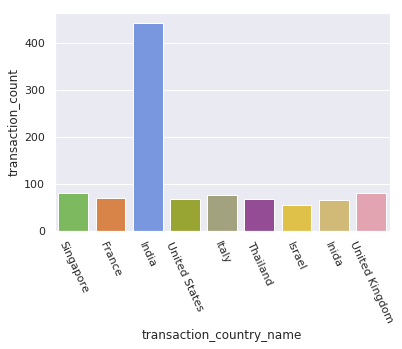

In [41]:
# Bar Plot
sns.barplot(x='transaction_country_name', y='transaction_count', data=transaction_detail_count_by_country_pd_df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-65);

In [42]:
transaction_detail_count_by_country_pd_df.head(25)

,transaction_country_name,transaction_count
0,Singapore,80
1,France,70
2,India,441
3,United States,68
4,Italy,75
5,Thailand,67
6,Israel,55
7,Inida,65
8,United Kingdom,79


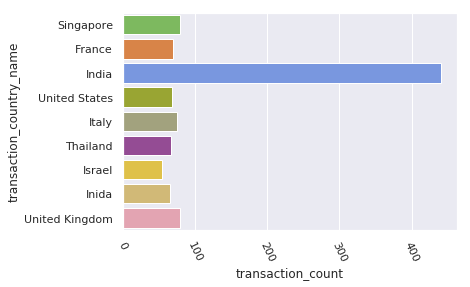

In [43]:
# Bar Plot - Horizontal
sns.barplot(x='transaction_count', y='transaction_country_name', data=transaction_detail_count_by_country_pd_df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-65);